## Assigment 10

### Part 1

Urls of website I read and videos I watched:
Watched 2 of the videos
Downloaded and read Chapter 14

Read: 
https://ipython-books.github.io/71-exploring-a-dataset-with-pandas-and-matplotlib/

https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas/notebook

### Part 2

#### Import all library neccessary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


#### Download the Transit Pass-Up database

In [2]:
url = "https://data.winnipeg.ca/api/views/mer2-irmb/rows.csv?accessType=DOWNLOAD"
from urllib.request import urlretrieve
urlretrieve(url,"transitpassup.csv")

('transitpassup.csv', <http.client.HTTPMessage at 0x26fc01302e0>)

#### Get the first five item from data

In [3]:
data = pd.read_csv("transitpassup.csv")
data.head()

,Pass-Up ID,Pass-Up Type,Time,Route Number,Route Name,Route Destination,Location
0,3054784,Full Bus Pass-Up,11/23/2019 07:30:06 PM,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641)
1,3054854,Full Bus Pass-Up,11/24/2019 09:49:15 AM,170,Fort Richmond - St. Norbert,To Downtown,POINT (-97.151684893085 49.81759394067)
2,3055024,Full Bus Pass-Up,11/24/2019 04:02:09 PM,11,Portage-Kildonan,To Polo Park,POINT (-97.150726428724 49.89119427188)
3,3055083,Full Bus Pass-Up,11/24/2019 06:35:54 PM,11,Portage-Kildonan,Via Donwood,POINT (-97.196676428673 49.881016294322)
4,3054785,Full Bus Pass-Up,11/23/2019 07:30:14 PM,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641)


#### Get the graph for the data we got

<Axes: >

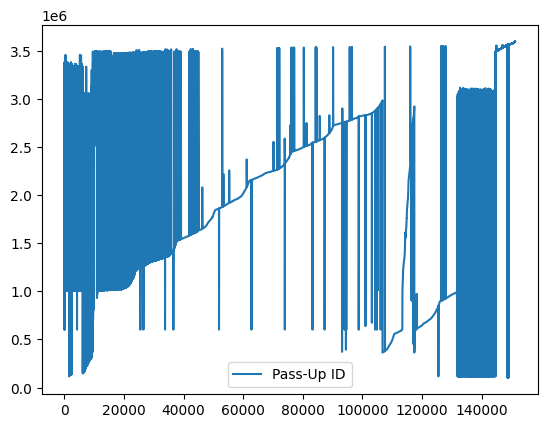

In [4]:
data.plot()

I am not able to get anything useful out of this graph

#### Get the data shape

In [5]:
print(data.shape)


(151228, 7)


#### Get all the column of data

In [6]:
print(data.columns)

Index(['Pass-Up ID', 'Pass-Up Type', 'Time', 'Route Number', 'Route Name',
       'Route Destination', 'Location'],
      dtype='object')


#### Get the description of data 

In [7]:
data.describe()

,Pass-Up ID
count,1.512280e+05
mean,1.935745e+06
std,9.206017e+05
min,1.046950e+05
25%,1.237492e+06
50%,1.983402e+06
75%,2.747604e+06
max,3.598121e+06


I can't find something useful here

#### Create a dataframe of Pass-Up Type and its count

In [8]:
passup_counts = data['Pass-Up Type'].value_counts()
passup_duplicates = pd.DataFrame({'Pass-Up Type': passup_counts.index, 'Count': passup_counts.values})

print(passup_duplicates)

              Pass-Up Type   Count
0         Full Bus Pass-Up  142702
1  Wheelchair User Pass-Up    8526


#### Create a dataframe of Route Name and its count

In [9]:
route_counts = data['Route Name'].value_counts()
route_duplicates = pd.DataFrame({'Route Name': route_counts.index, 'Count': route_counts.values})

print(route_duplicates)

                           Route Name  Count
0                    Portage-Kildonan  13259
1                      Crosstown East  10827
2    Ft. Richmond-St. Norbert Express   9399
3                  North Main-Corydon   7492
4             Marion-Logan-Notre Dame   7019
..                                ...    ...
118              St. James Collegiate      1
119                               rrx      1
120             St.John's High School      1
121                wb portage burnell      1
122                        On-Request      1

[123 rows x 2 columns]


#### draw a bar chart of the highest 20 Route Name and its count

<Axes: xlabel='Route Name'>

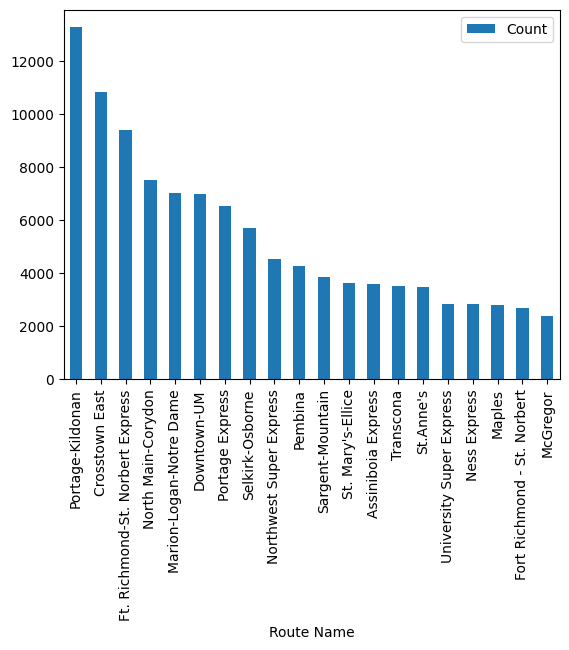

In [10]:
route_duplicates.head(20).plot.bar(x = 'Route Name', y = 'Count')

Portage-Kildonan is the route with the highest count of pass-up with more than 13000 pass-ups since the creation of the database

#### draw a bar chart of the lowest 20 Route Name and its count

<Axes: xlabel='Route Name'>

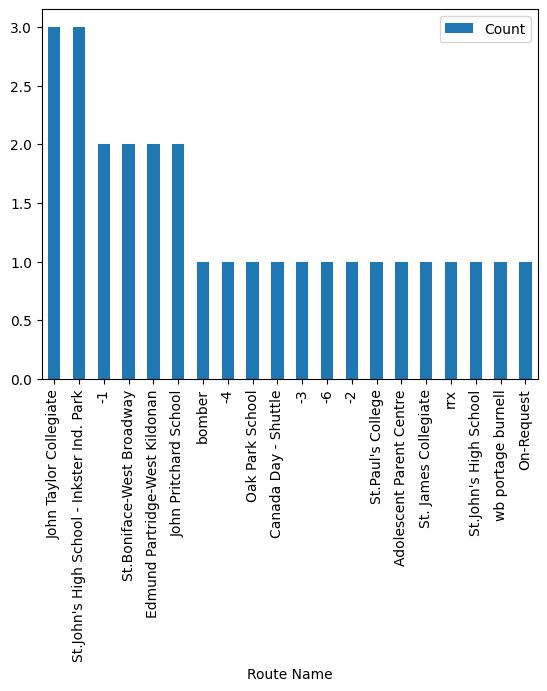

In [11]:
route_duplicates.tail(20).plot.bar(x = 'Route Name', y = 'Count')

#### Get the description of count

In [12]:
route_duplicates.describe()

,Count
count,123.000000
mean,1131.617886
std,2266.625836
min,1.000000
25%,12.500000
50%,161.000000
75%,1002.000000
max,13259.000000


There are some useful information here. We can see that there is no route that has zero pass up on the chart, which suggest that there is no route that doesn't have at least on pass up since when the data base created, or it just simply wasn't registered to the system if there is zero.

#### Create a dataframe of Hour and the amount of Pass-Up within that hour

In [13]:
data['Time'] = pd.to_datetime(data['Time'])  # convert the 'Time' column to a datetime data type
data['Hour'] = data['Time'].dt.hour  # create a new 'Hour' column with the hour of the day
hour_counts = data['Hour'].value_counts().sort_index()
hour_passups = pd.DataFrame({'Hour': hour_counts.index, 'Pass-Up Count': hour_counts.values})

print(hour_passups)

    Hour  Pass-Up Count
0      0            227
1      1             19
2      2              4
3      4              2
4      5             13
5      6            250
6      7           9670
7      8          13142
8      9          11961
9     10           4631
10    11           3826
11    12           6610
12    13           6287
13    14          13437
14    15          21580
15    16          35404
16    17          12565
17    18           3065
18    19           3193
19    20           1561
20    21           2187
21    22           1155
22    23            439


I did not expect that there is no passup on 3am, that's why I did not check and add 3 am to the dataframe

#### Reindex hour_counts with value from 0 to 23 to make sure that 3 am is included and set the pass up count to zero

In [14]:
all_hours = pd.Series(range(24))
hour_counts = hour_counts.reindex(all_hours, fill_value=0) #Fill missing value with 0

hour_passups = pd.DataFrame({'Hour': hour_counts.index, 'Pass-Up Count': hour_counts.values})
print(hour_passups)

    Hour  Pass-Up Count
0      0            227
1      1             19
2      2              4
3      3              0
4      4              2
5      5             13
6      6            250
7      7           9670
8      8          13142
9      9          11961
10    10           4631
11    11           3826
12    12           6610
13    13           6287
14    14          13437
15    15          21580
16    16          35404
17    17          12565
18    18           3065
19    19           3193
20    20           1561
21    21           2187
22    22           1155
23    23            439


#### Describe the Hour

In [15]:
hour_passups.describe()

,Hour,Pass-Up Count
count,24.000000,24.000000
mean,11.500000,6301.166667
std,7.071068,8499.869455
min,0.000000,0.000000
25%,5.750000,244.250000
50%,11.500000,3129.000000
75%,17.250000,10242.750000
max,23.000000,35404.000000


#### Draw a graph of the hour and the amount of pass up within that hour

<Axes: >

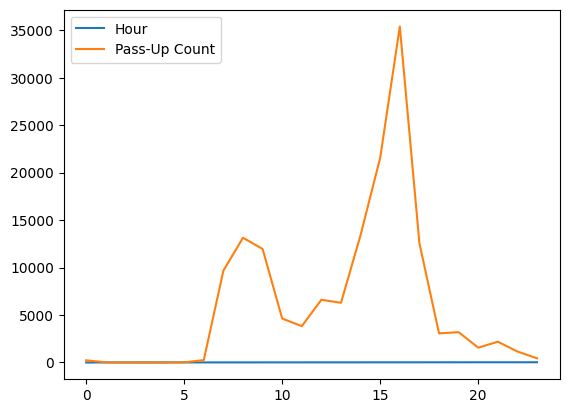

In [16]:
hour_passups.plot()

I saw an interesting fact that most of the pass-ups are at around 3:30 pm and 7 am. This can be explained since those are the times that children go to school and leave school to go home. Most of the adults have car so they don't take bus, and this graph prove that the poor bus service on those hoursw are due to the high usage from student.

#### Download the Province of Manitoba - Potential COVID-19 Exposures database

In [17]:
url = "https://data.winnipeg.ca/api/views/r4hg-nw9q/rows.csv?accessType=DOWNLOAD"
from urllib.request import urlretrieve
urlretrieve(url,"PotentialCOVID19.csv")

('PotentialCOVID19.csv', <http.client.HTTPMessage at 0x26fc8c0aa70>)

#### Get the first five item from the database

In [18]:
data2 = pd.read_csv("PotentialCOVID19.csv")
data2.head()

,Date,Date Added,Location,Endroit,Address,Address-fr,Transit Route,Details,Précisions,Variant of Concern,Variant Préoccupant
0,10/20/2020 12:00:00 AM,10/27/2020 12:00:00 AM,"Winnipeg Police Service Central Division, Head...",Division centrale du Service de police de Winn...,245 Smith St.,"245, rue Smith",NaN,The two affected Winnipeg Police Service membe...,Les deux membres du personnel du Service de po...,NaN,NaN
1,04/27/2021 12:00:00 AM,05/03/2021 12:00:00 AM,Winnipeg Transit Routes,"Régie des transports de Winnipeg, lignes","Régie des transports de Winnipeg, lignes","Régie des transports de Winnipeg, lignes",BLUE,BLUE from Chancellor Station at approximately ...,"Ligne BLEUE, depuis la station Chancellor, à e...",NaN,NaN
2,06/12/2021 12:00:00 AM,06/21/2021 12:00:00 AM,Winnipeg Transit Route,"Régie des transports de Winnipeg, ligne","Régie des transports de Winnipeg, ligne","Régie des transports de Winnipeg, ligne",14,Route 14 from Arlington St. and Ellice Ave. at...,"Ligne 14, depuis le coin de la rue Arlington e...",NaN,NaN
3,06/07/2021 12:00:00 AM,06/14/2021 12:00:00 AM,Winnipeg Transit Routes,"Régie des transports de Winnipeg, lignes","Régie des transports de Winnipeg, lignes","Régie des transports de Winnipeg, lignes",11,Route 21 from Portage Ave. and Donald St. at a...,"Ligne 21, depuis le coin de l’avenue Portage e...",NaN,NaN
4,06/15/2021 12:00:00 AM,NaN,Winnipeg Transit Routes,"Régie des transports de Winnipeg, lignes","Régie des transports de Winnipeg, lignes","Régie des transports de Winnipeg, lignes",676,Route 676 from Chancellor Dr. and Gaylene Pl. ...,"Ligne 676, depuis le coin de la promenade Chan...",NaN,NaN


#### Get the data shape

In [19]:
print(data2.shape)

(678, 11)


#### Get the data columns

In [20]:
print(data2.columns)

Index(['Date', 'Date Added', 'Location', 'Endroit', 'Address', 'Address-fr',
       'Transit Route', 'Details', 'Précisions', 'Variant of Concern',
       'Variant Préoccupant'],
      dtype='object')


I see that there are a few columns are in French. I want to eliminate those

#### Create a copy of data2 but without Frech column

In [21]:
data2_eng = data2[["Date", "Date Added", "Location", "Address", "Transit Route", "Details", "Variant of Concern"]]


#### Get the first five item from data2_eng

In [22]:
data2_eng.head()

,Date,Date Added,Location,Address,Transit Route,Details,Variant of Concern
0,10/20/2020 12:00:00 AM,10/27/2020 12:00:00 AM,"Winnipeg Police Service Central Division, Head...",245 Smith St.,NaN,The two affected Winnipeg Police Service membe...,NaN
1,04/27/2021 12:00:00 AM,05/03/2021 12:00:00 AM,Winnipeg Transit Routes,"Régie des transports de Winnipeg, lignes",BLUE,BLUE from Chancellor Station at approximately ...,NaN
2,06/12/2021 12:00:00 AM,06/21/2021 12:00:00 AM,Winnipeg Transit Route,"Régie des transports de Winnipeg, ligne",14,Route 14 from Arlington St. and Ellice Ave. at...,NaN
3,06/07/2021 12:00:00 AM,06/14/2021 12:00:00 AM,Winnipeg Transit Routes,"Régie des transports de Winnipeg, lignes",11,Route 21 from Portage Ave. and Donald St. at a...,NaN
4,06/15/2021 12:00:00 AM,NaN,Winnipeg Transit Routes,"Régie des transports de Winnipeg, lignes",676,Route 676 from Chancellor Dr. and Gaylene Pl. ...,NaN


#### Create a dataframe that includes the transit route and the amount of report it has

In [23]:
route_counts = data2_eng['Transit Route'].value_counts()
route_duplicates = pd.DataFrame({'Transit Route': route_counts.index, 'Count': route_counts.values})

print(route_duplicates)

   Transit Route  Count
0           BLUE     61
1             11     50
2             77     44
3             47     38
4             18     38
..           ...    ...
59            22      1
60           677      1
61             2      1
62           676      1
63            42      1

[64 rows x 2 columns]


#### Create a bar chart for the datafram of transit route and its report amount

<Axes: xlabel='Transit Route'>

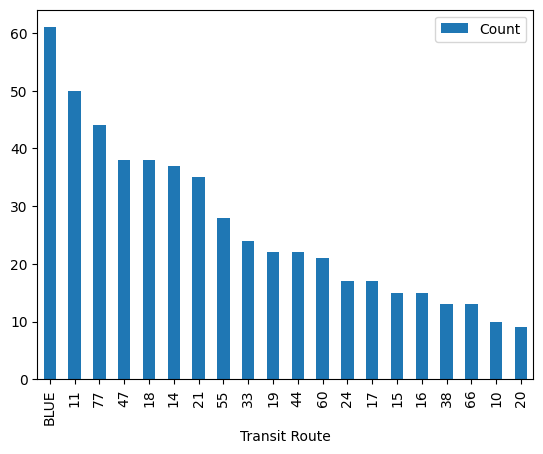

In [24]:
route_duplicates.head(20).plot.bar(x = "Transit Route", y = "Count")

The Blue is the bus route with the highest amount of report for COVID 19

#### Create a dataframe which contains date and its count

In [25]:
data2_eng['Date'] = pd.to_datetime(data2_eng['Date'])  # convert the 'Date' column to a datetime data type
data2_eng['Day'] = data2_eng['Date'].dt.date  # create a new 'Hour' column with the hour of the day

date_counts = data2_eng['Date'].value_counts().sort_index()
date_df = pd.DataFrame({'Date': date_counts.index, 'Date Count': date_counts.values})



C:\Users\daida\AppData\Local\Temp\ipykernel_26348\2188276855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_eng['Date'] = pd.to_datetime(data2_eng['Date'])  # convert the 'Date' column to a datetime data type
C:\Users\daida\AppData\Local\Temp\ipykernel_26348\2188276855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_eng['Day'] = data2_eng['Date'].dt.date  # create a new 'Hour' column with the hour of the day


#### Create a graph of the density and insensity of the COVID report from 9-2020 to 1-2022

<Axes: xlabel='Date'>

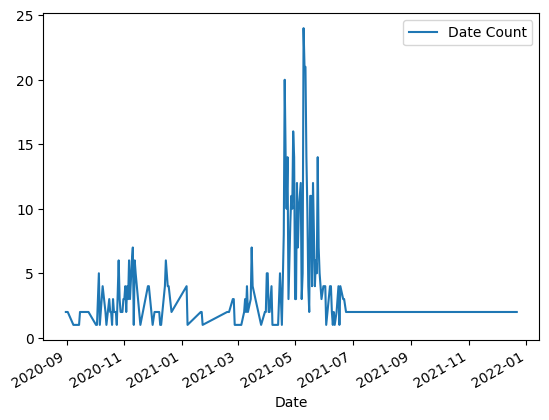

In [26]:
date_df.plot(x='Date', y='Date Count')

I see that there are two spikes of COVID report. One is between October 2020 and January 2021, and one is from March 2021 to June 2021. In those two, the one from March 2021 to June 2021 is the more servere one since there are a lot of COVID report in one day and the density in that period is high.

#### Download the Speed limits of Winnipeg database

In [27]:
url = "https://data.winnipeg.ca/api/views/j5wn-5wz7/rows.csv?accessType=DOWNLOAD"
from urllib.request import urlretrieve
urlretrieve(url,"speedlimit.csv")

('speedlimit.csv', <http.client.HTTPMessage at 0x26fc8db3580>)

#### Get the first five item from the database

In [28]:
data3 = pd.read_csv("speedlimit.csv")
data3.head()

,ID,Street Name,Street Qualifier,Begin Measure,End Measure,Speed Limit,Speed Limit Description,Speed Limit Jurisdiction,Location
0,2022,Transit 27679,Transit_Walk,0.00000,42.53678,3,Walking Speed,City_Transit,MULTILINESTRING ((-97.078153234058 49.83523439...
1,4982,North Town Rd,B,859.74723,1245.59130,50,Speed Limits are less than or equal to 50 kph,City Transportation,MULTILINESTRING ((-97.199059801215 49.79872280...
2,10027,Degrave St,A,0.00000,188.84532,50,Speed Limits are less than or equal to 50 kph,City Transportation,MULTILINESTRING ((-97.151103914582 49.96112887...
3,10028,Fernbank Ave,B,0.00000,59.25960,50,Speed Limits are less than or equal to 50 kph,City Transportation,MULTILINESTRING ((-97.108880193102 49.96987836...
4,10029,Fernbank Ave,B,59.25960,88.95489,50,Speed Limits are less than or equal to 50 kph,City Transportation,MULTILINESTRING ((-97.109609087034 49.96966303...


#### Create a dataframe which contains Speed Limit type and its count

In [29]:
speedlimit_counts = data3['Speed Limit'].value_counts().sort_index()
speedlimit_df = pd.DataFrame({'Speed Limit': speedlimit_counts.index, 'Count': speedlimit_counts.values}, index=speedlimit_counts.index)


#### Create a pie chart of the proportion between the ammoun of each of the speed limit

<Axes: ylabel='Count'>

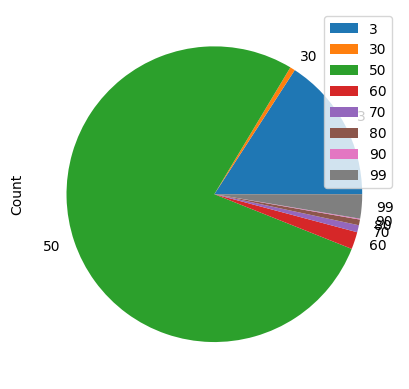

In [30]:
speedlimit_df.plot.pie(y='Count')

The graph above show that the proportion of 50 km/h speed limit is very high compare to others. The amount of speed limit of 3 km/h is also high but not comparable to 50 km/h one. This fact show that in the city of Winnipeg, the amount of residential area route is more than the amount of walking zone route